In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
import math
import pandas as pd

# Logistic Regression
## Feed-Forward Pass
$N$: number of samples  
$D$: number of features  
$y_{N\times 1}=\sigma\left(x_{N\times D}\cdot w_{D\times 1}+b\right)$ with the sigmoid applied element-wise $\sigma(z) = \frac{1}{1+\exp^{-z}}$

equivalent to  
$y_{N\times 1}=\sigma\left(\left[\overline{1}, x\right]_{N\times D+1}\cdot \left[b,w_1,...,w_D\right]_{D+1\times 1}\right)$

In [4]:
N = 100 # number of samples
D = 2 # number of features

In [8]:
X = np.random.randn(N,D)
X

array([[-1.79653553,  0.29458543],
       [ 0.68935223, -0.54913971],
       [ 0.2879558 , -0.8912533 ],
       [ 0.45452551,  0.10263863],
       [ 0.2843412 ,  0.18281402],
       [-2.48527579,  0.82597771],
       [-0.05050843,  1.83182934],
       [-0.09262069, -0.11049331],
       [-0.07378221,  0.46401698],
       [-1.62264403,  1.86536008],
       [ 1.09990702, -0.01272595],
       [-0.21334384, -1.42335504],
       [-0.10939869,  0.76419982],
       [-1.10190041,  2.43101378],
       [-0.42591817, -0.4485846 ],
       [-0.55581641,  0.49026418],
       [ 0.47301209, -2.17142904],
       [-0.07539542, -1.5914415 ],
       [-1.70977055,  0.23434504],
       [ 1.39288301, -0.44111806],
       [-1.46228287,  0.09709204],
       [ 0.12050839,  0.33887706],
       [-0.23582299, -0.73511164],
       [-0.81678123,  1.4305503 ],
       [-1.81360983, -0.03222434],
       [ 1.03360674,  1.88089409],
       [ 0.27960062,  0.39186663],
       [-0.34567378, -0.08595907],
       [-0.26762223,

In [9]:
ones = np.array([[1]*N]).T
ones

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [12]:
Xb = np.concatenate((ones, X), axis=1)
Xb

array([[ 1.        , -1.79653553,  0.29458543],
       [ 1.        ,  0.68935223, -0.54913971],
       [ 1.        ,  0.2879558 , -0.8912533 ],
       [ 1.        ,  0.45452551,  0.10263863],
       [ 1.        ,  0.2843412 ,  0.18281402],
       [ 1.        , -2.48527579,  0.82597771],
       [ 1.        , -0.05050843,  1.83182934],
       [ 1.        , -0.09262069, -0.11049331],
       [ 1.        , -0.07378221,  0.46401698],
       [ 1.        , -1.62264403,  1.86536008],
       [ 1.        ,  1.09990702, -0.01272595],
       [ 1.        , -0.21334384, -1.42335504],
       [ 1.        , -0.10939869,  0.76419982],
       [ 1.        , -1.10190041,  2.43101378],
       [ 1.        , -0.42591817, -0.4485846 ],
       [ 1.        , -0.55581641,  0.49026418],
       [ 1.        ,  0.47301209, -2.17142904],
       [ 1.        , -0.07539542, -1.5914415 ],
       [ 1.        , -1.70977055,  0.23434504],
       [ 1.        ,  1.39288301, -0.44111806],
       [ 1.        , -1.46228287,  0.097

In [16]:
w = np.random.randn(D + 1) # the first element is the bias term b

In [17]:
w

array([-0.91189644, -1.1037213 ,  0.61988983])

In [14]:
z = Xb.dot(w)
z.shape

(100,)

In [ ]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [15]:
sigmoid(z)

array([0.43261643, 0.25010156, 0.26265322, 0.2810963 , 0.29333312,
       0.50000446, 0.36570989, 0.30715505, 0.323542  , 0.47540366,
       0.24249715, 0.2759143 , 0.33515996, 0.45843199, 0.3172541 ,
       0.35511443, 0.21994346, 0.26349908, 0.424482  , 0.21703546,
       0.40269294, 0.30777478, 0.29711831, 0.40387651, 0.42249072,
       0.29895406, 0.29978386, 0.32345053, 0.39900088, 0.28928087,
       0.35455684, 0.27410906, 0.25401297, 0.30845475, 0.32068239,
       0.32125437, 0.34943234, 0.31403399, 0.33900489, 0.21776156,
       0.31024359, 0.32227316, 0.33007647, 0.19779438, 0.39354161,
       0.48337812, 0.42438553, 0.32025386, 0.32325806, 0.33223031,
       0.37617363, 0.33255036, 0.21879767, 0.26491878, 0.24746561,
       0.4008548 , 0.38634873, 0.3588715 , 0.25053006, 0.20679187,
       0.40562739, 0.32471527, 0.41188329, 0.26413369, 0.35024416,
       0.22507787, 0.41665574, 0.35212916, 0.36304783, 0.36201203,
       0.25747004, 0.28041304, 0.2467085 , 0.3565538 , 0.17322

## The Data

pdf of the multivariate Gaussian:
$$p(x)=\frac{1}{\sqrt{\left(2\pi\right)^D|\Sigma|}}\exp^{-\frac{1}{2}\left(x-\mu\right)^T\Sigma^{-1}\left(x-\mu\right)}$$

Bayes' Theorem:
$$

Normal distribution of one random variable $x$ with standard deviation $\sigma$ (variance $\sigma^2$) and mean $\mu$: 
$$f(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

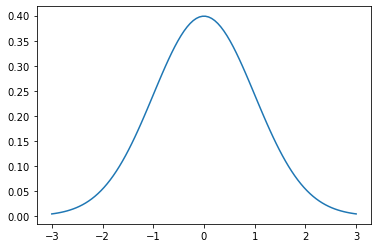

In [41]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x, stats.norm.pdf(x, mu, sigma))

In [47]:
mu_0 = [-2,-2]
variance = 1

mu_1 = [2,2]

m_cov = [[variance, 0],
         [0, variance]]

df_0= pd.DataFrame(np.random.multivariate_normal(mu_0, m_cov, N), columns=["x", "y"])
df_0["class"] = [0]*len(df_0)
df_1= pd.DataFrame(np.random.multivariate_normal(mu_1, m_cov, N), columns=["x", "y"])
df_1["class"] = [1]*len(df_1)
df = pd.concat([df_0, df_1])

In [48]:
def multivariateGrid(col_x, col_y, col_k, df, k_is_color=False, scatter_alpha=.5):
    def colored_scatter(x, y, c=None):
        def scatter(*args, **kwargs):
            args = (x, y)
            if c is not None:
                kwargs['c'] = c
            kwargs['alpha'] = scatter_alpha
            plt.scatter(*args, **kwargs)

        return scatter

    g = sns.JointGrid(
        x=col_x,
        y=col_y,
        data=df
    )
    color = None
    legends=[]
    for name, df_group in df.groupby(col_k):
        legends.append(name)
        if k_is_color:
            color=name
        g.plot_joint(
            colored_scatter(df_group[col_x],df_group[col_y],color),
        )
        sns.distplot(
            df_group[col_x].values,
            ax=g.ax_marg_x,
            color=color,
        )
        sns.distplot(
            df_group[col_y].values,
            ax=g.ax_marg_y,
            color=color,            
            vertical=True
        )
    # Do also global Hist:
    sns.distplot(
        df[col_x].values,
        ax=g.ax_marg_x,
        color='grey'
    )
    sns.distplot(
        df[col_y].values.ravel(),
        ax=g.ax_marg_y,
        color='grey',
        vertical=True
    )
    plt.legend(legends)

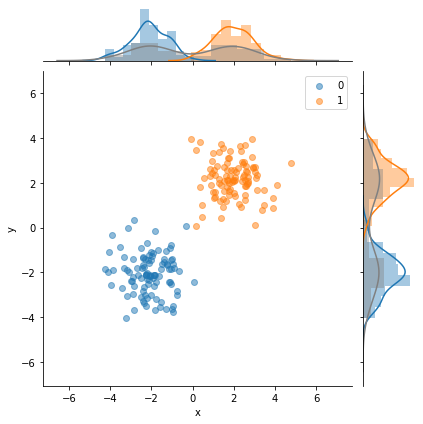

In [49]:
multivariateGrid('x', 'y', 'class', df=df)

In [ ]:
Xb = np.concatenate((ones, X), axis=1)

## The Loss Function